In [132]:
#importing required packages
import pandas as pd
import lightgbm as lgb
import numpy as np
from pybaseball import statcast_pitcher, playerid_lookup
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [133]:
playerid_lookup('paddack')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,paddack,chris,663978,paddc001,paddach01,20099,2019.0,2020.0


In [134]:
#gathering 2018-2019 pitches for Paddack 
data = statcast_pitcher('2019-03-15','2019-11-30',663978)

Gathering Player Data


In [135]:
data.pitch_type.unique()

array(['FF', 'CH', 'CU'], dtype=object)

In [136]:
data['pitch_type'].replace(['FF', 'CH', 'CU'], [0,1,2],inplace = True)

In [207]:
new_data = data

In [208]:
#getting the necessary columns for the model
X1 = new_data[['release_pos_x', 'release_pos_z', 'strikes','balls']]

#singling out the variable we want to predict
Y1 = new_data['pitch_type']

In [209]:
#splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.3,random_state=0)

In [210]:
d_train=lgb.Dataset(X_train, label=y_train)

In [214]:
#setting up the parameters
params={}
params['num_leaves'] = 10
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']= 5
params['num_class']=3 #no.of unique values in the target class not inclusive of the end value
params['min_data_in_leaf'] = 10
params['class_weight'] = 'balanced'

In [215]:
#training the model
clf=lgb.train(params,d_train,500)

In [216]:
#prediction on the test dataset
y_pred_1=clf.predict(X_test)

In [217]:
#argmax() method 
y_pred_1 = [np.argmax(line) for line in y_pred_1]

In [218]:
#using precision score for error metrics
precision_score(y_pred_1,y_test,average=None).mean()

0.6237549953788252

In [219]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       421
           1       0.84      0.90      0.87       184
           2       0.23      0.04      0.07        79

    accuracy                           0.82       684
   macro avg       0.63      0.62      0.60       684
weighted avg       0.76      0.82      0.78       684



In [220]:
confusion_matrix(y_test, y_pred_1)

array([[392,  20,   9],
       [ 17, 166,   1],
       [ 65,  11,   3]])

In [223]:
pitches = data.pitch_type.unique()

In [225]:
pitches = pitches.tolist()

[0, 1, 2]

In [226]:
range(len(pitches))

range(0, 3)

In [420]:
#the following code is what I used to generate all the release point plots
verlander = statcast_pitcher('2019-03-15','2019-11-30', 434378)

Gathering Player Data


In [421]:
pitches = verlander.pitch_type.unique().tolist()
for i in range(len(pitches)):
        if (len(verlander[verlander['pitch_type']== pitches[i]])/len(verlander)) <= 0.075:
            verlander = verlander[verlander['pitch_type']!= pitches[i]]

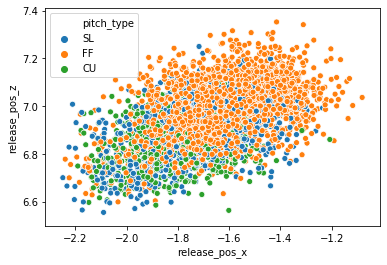

In [422]:
import seaborn as sns
sns.scatterplot(verlander['release_pos_x'],verlander['release_pos_z'], hue = verlander['pitch_type'])